# Netflix EDA and AI Movie Recommendation Model

## Project Overview :

Performs a comprehensive exploratory data analysis (EDA) and builds a content-based AI movie recommendation system using the Netflix dataset. The workflow includes systematic data cleaning, feature engineering, descriptive statistics, and visualization of key patterns such as genre distribution, release-year trends, and country-wise content production. Numerical feature extraction enables advanced techniques like PCA and correlation heatmaps. TF-IDF vectorization combined with cosine similarity is used to design a recommendation engine that suggests similar titles based on plot descriptions.

## Import Required Libraries :

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## Load Dataset :

In [53]:
df = pd.read_csv("netflix_titles.csv")
df


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## Dataset Description :

Apart from `release_year`, the original Netflix dataset does not contain true numerical features.  
Most of the columns are stored as text-based values, which fall into several categories:

### 1. Categorical Features  
These are columns with a fixed set of categories or labels, such as:
- `type` (Movie or TV Show)
- `rating` (e.g., TV-MA, PG-13)
- `country`
- `director`
- `cast`

These fields help in grouping and filtering the data.

### 2. Text Features  
Some columns contain free-form text rather than structured categories:
- `title`
- `description`

The `description` column is especially important for building the recommendation system using text similarity.

### 3. Date Feature  
The column:
- `date_added`

is stored as a string in the original dataset and needs to be converted into a proper datetime format for analysis.

### 4. Multi-label Text Features  
Columns like:
- `listed_in` (genres)
- `cast`
- `country`

may contain multiple values separated by commas. These require splitting to analyze each category individually.

### 5. String-formatted Numerical Values  
The column:
- `duration`

contains numbers embedded inside text, such as `"90 min"` or `"2 Seasons"`.  
These values must be extracted and converted into numerical form during preprocessing.

---

Overall, the dataset is mainly composed of categorical and text-based features, with only one column (`release_year`) being purely numerical.


In [54]:
df.shape

(8807, 12)

- The `df.shape` output confirms that the Netflix dataset contains **8,807 rows and 12 columns**, indicating a fairly large collection of titles available for analysis.

In [55]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

- The `df.columns` output lists all the features present in the dataset, which include information related to the `title`, `type` of content (Movie or TV Show), `cast`, `director`, `country` of origin,`date_added`, `rating`, `duration`, `release_year`,and `description`. These columns capture a wide range of metadata, making the dataset rich for EDA and ideal for constructing a content-based filtering system.

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


- The `df.info()` summary shows that the Netflix dataset contains 8,807 rows and 12 columns. Most columns are stored as object datatypes, meaning they hold text-based information such as titles, cast, genres, and descriptions, while `release_year` is the only numeric field.
The non-null counts indicate that some columns have missing values, especially `director`, `cast`, and `country`, which show noticeable gaps. Smaller amounts of missing data are also present in `date_added`, `rating`, and `duration`. These incomplete fields need to be cleaned or filled to ensure consistency in further analysis.
Overall, the `df.info()` output highlights the data types and completeness of each column, helping us understand what preprocessing steps are required before performing EDA or building the recommendation model.


In [57]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

- From the above summary, we observe that the dataset contains several missing values across multiple columns. 
Although most fields have complete entries, some important columns such as `director`, `cast`, and `country` contain a significant number of missing values.These will affect our analysis if left untreated. Therefore, we will replace textual missing values with `"Unknown"` and clean the fields before performing EDA and building the recommendation model.This ensures consistency across the dataset and avoids biases during visual analysis and similarity-based recommendations.After handling all missing data, the dataset will be well-prepared for subsequent EDA and model development.


## Data Cleaning :

In [58]:
df['description'] = df['description'].fillna("")
df['cast'] = df['cast'].fillna("Unknown")
df['director'] = df['director'].fillna("Unknown")
df['country'] = df['country'].fillna("Unknown")
df['listed_in'] = df['listed_in'].fillna("Others")



- These cleaning steps ensure that the dataset is complete and usable for analysis. Text-based columns such as description, cast, and director often contain missing values, which would cause errors during TF-IDF vectorization, grouping, or visualizations. By replacing missing entries with appropriate placeholders like "Unknown" or "Others", we maintain the dataset’s integrity without discarding any titles. This makes the EDA results more reliable and enables the recommendation system to process every record smoothly.

| Column Name            | Issue Identified                                 | Cleaning Applied                | Reason                                                             |
| ---------------------- | ------------------------------------------------ | ------------------------------- | ------------------------------------------------------------------ |
| **description**        | Contains missing values (NaN)                    | Replaced with empty string `""` | TF-IDF vectorizer cannot process NaN; empty text is safer for NLP. |
| **cast**               | Many titles missing cast details                 | Replaced with `"Unknown"`       | Keeps dataset consistent; avoids gaps in actor analysis.           |
| **director**           | Director information missing for several entries | Replaced with `"Unknown"`       | Ensures grouping and value counts work properly.                   |
| **country**            | Missing country values                           | Replaced with `"Unknown"`       | Useful for country-based analysis without losing rows.             |
| **listed_in** (Genres) | Some titles have missing categories              | Replaced with `"Others"`        | Ensures every title has a genre; avoids NaN in plots.              |

  

# Exploratory Data Analysis (EDA) :

The process of examining and understanding a dataset before applying machine learning or building models.
It helps you discover:
- Patterns
- Trends
- Relationships
- Outliers
- Missing values
- Data distribution

EDA is the first and most important step in any data science or machine learning project.

## 1. Movies vs TV Shows 

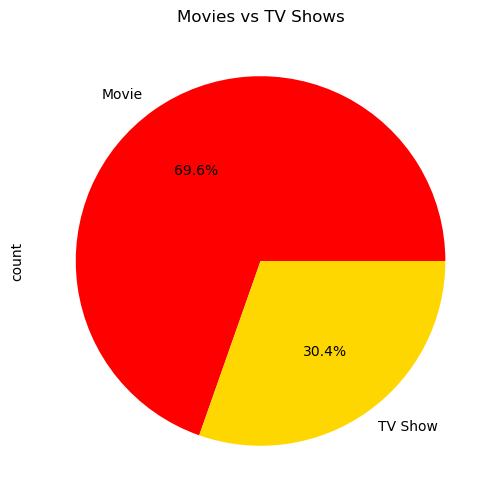

In [59]:
plt.figure(figsize=(6,6))
df['type'].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=['red','gold'])
plt.title("Movies vs TV Shows")
plt.show()


- This pie chart provides a clear comparison of the distribution between Movies and TV Shows available on Netflix.  
- The visualization shows that Netflix has a significantly larger proportion of Movies compared to TV Shows.  
- This indicates that Netflix’s content library is more movie-focused, although a notable portion still consists of TV shows, reflecting Netflix’s growing emphasis on series and episodic content.  
- Understanding this distribution is useful for analyzing user engagement, recommendation strategies, and overall content availability.


## 2. Top Genres

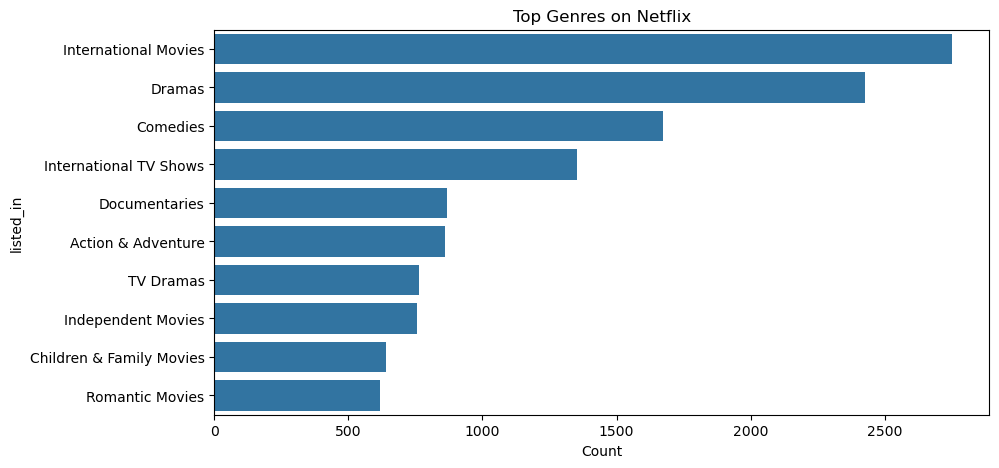

In [60]:
genres = df["listed_in"].str.split(", ").explode().value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=genres.values, y=genres.index)
plt.title("Top Genres on Netflix")
plt.xlabel("Count")
plt.show()


- This bar chart highlights the most frequent genres listed in the dataset.  
- “International Movies,” “Dramas,” and “Comedies” appear as the most dominant categories.  
- This suggests that Netflix has a broad international content strategy and prioritizes genres with high global demand.  
- The genre distribution also helps identify viewer preferences and supports personalized recommendation systems by showing which genres appear most frequently in the catalog.


## 3. Top Countries Producing Content

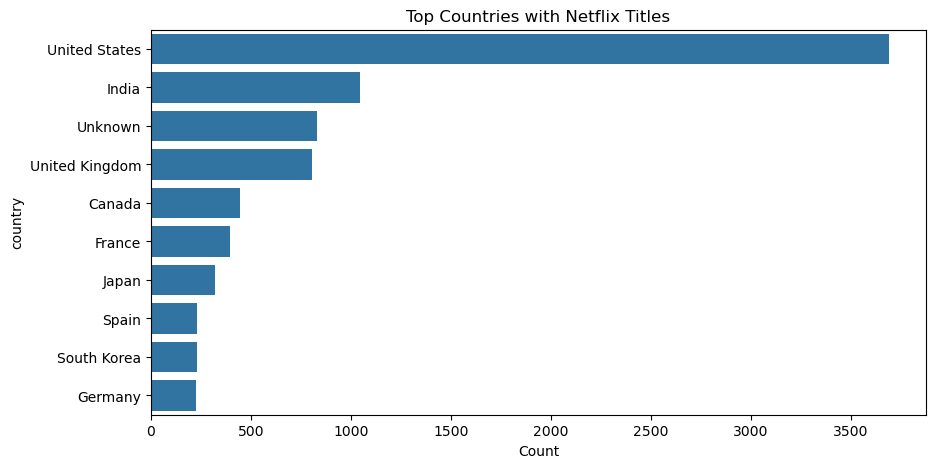

In [61]:
countries = df["country"].str.split(", ").explode().value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=countries.values, y=countries.index)
plt.title("Top Countries with Netflix Titles")
plt.xlabel("Count")
plt.show()


- This chart shows which countries contribute the highest number of titles to Netflix.  
- The United States overwhelmingly dominates content production, followed by India and the United Kingdom.  
- The presence of “Unknown” reflects missing country information in the dataset.  
- This distribution highlights Netflix’s strong presence in American and Indian markets and its continued expansion into international territories.  
- Analyzing country-wise content also helps understand the cultural diversity and global reach of Netflix’s catalog.


## 4. Most Frequent Actors

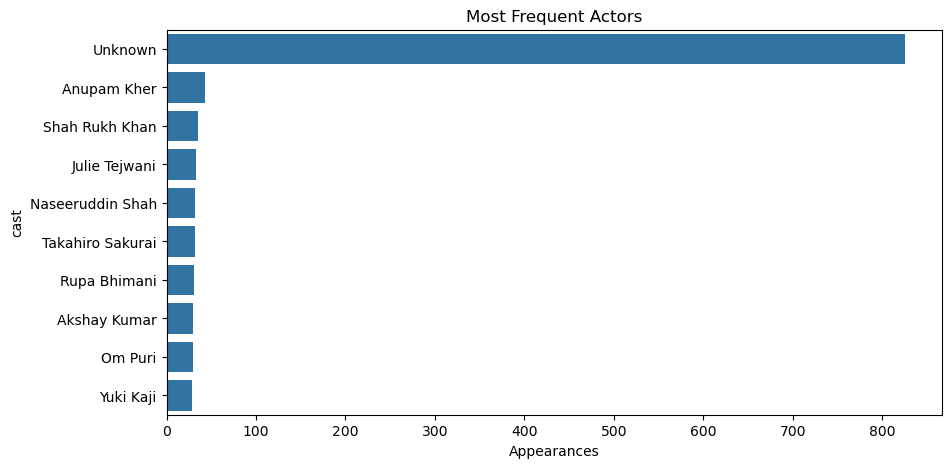

In [62]:
actors = df["cast"].str.split(", ").explode().value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=actors.values, y=actors.index)
plt.title("Most Frequent Actors")
plt.xlabel("Appearances")
plt.show()


- This horizontal bar chart shows the top actors appearing most frequently in Netflix titles.
The presence of "Unknown" at the top indicates that many titles do not list a cast, which is typical for documentaries and international content. Among the known actors, several are from Indian and international film industries, showing Netflix’s strong representation of diverse regional cinema.
- This analysis highlights which actors appear repeatedly across the platform and can help understand casting patterns or localization strategies. It also shows the incompleteness of metadata for many titles.

## 5. Distribution of Content Ratings

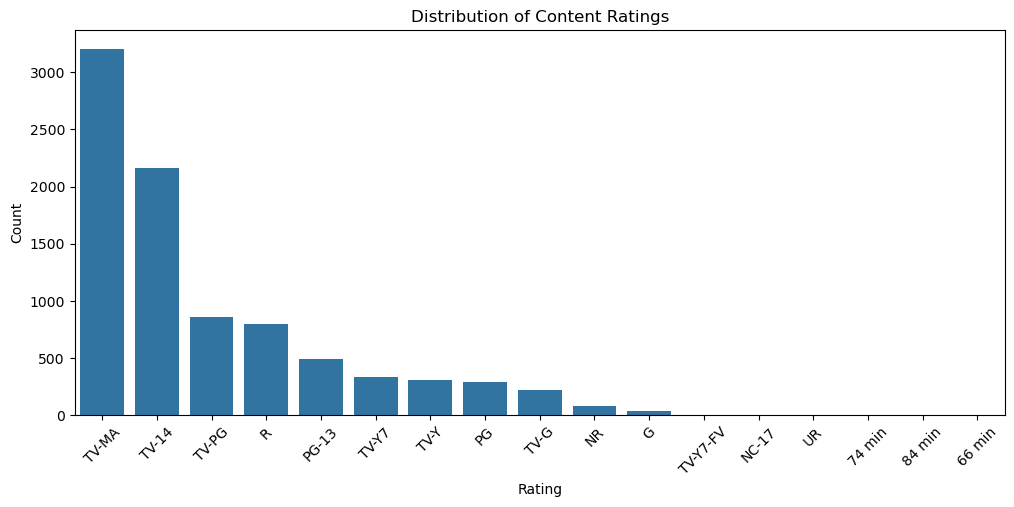

In [63]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of Content Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


- This graph visualizes how Netflix titles are classified based on maturity ratings.  
- TV-MA, TV-14, and TV-PG are the most common ratings, suggesting that Netflix’s catalog primarily targets mature and teenage audiences.  
- Lower frequencies for G, TV-Y, and other kid-friendly ratings indicate that children’s content forms a smaller portion of the platform.  
- This analysis helps understand the overall audience focus of Netflix and is also useful for parental controls and content recommendation strategies.


## Creation of numerical features from existing data :

Most machine learning algorithms and advanced EDA techniques cannot work directly on text.The Netflix dataset is mostly textual and categorical, but for deeper analysis and ML visualizations we need numeric columns.
So we generate new numerical features such as:
-  `duration_minutes` (Movie runtime)
-  `seasons` (Number of seasons for TV shows)
-  `year_added`
-  `month_added`

### Convert `duration` → numeric duration for Movies

In [64]:
# Filter only movies
df_movies = df[df['type'] == "Movie"].copy()

# Remove " min" and convert to number
df_movies['duration_minutes'] = df_movies['duration'].str.replace(" min", "")
df_movies['duration_minutes'] = df_movies['duration_minutes'].astype(float)


### Convert `date_added` → numeric features (`year_added`, `month_added`)

In [65]:
# Convert the date column
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


# Create new numeric columns
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


### Create `seasons` for TV Shows

In [66]:
# Filter only TV Shows
df_tv = df[df['type'] == "TV Show"].copy()

# Extract only the number from "1 Season" / "3 Seasons"
df_tv['seasons'] = df_tv['duration'].str.extract(r"(\d+)").astype(float)


### Combine numeric features back into main dataset

In [67]:
# Merge both new columns into main df
df['duration_minutes'] = df_movies['duration_minutes']
df['seasons'] = df_tv['seasons']


## 6. Release Year Trend Analysis :

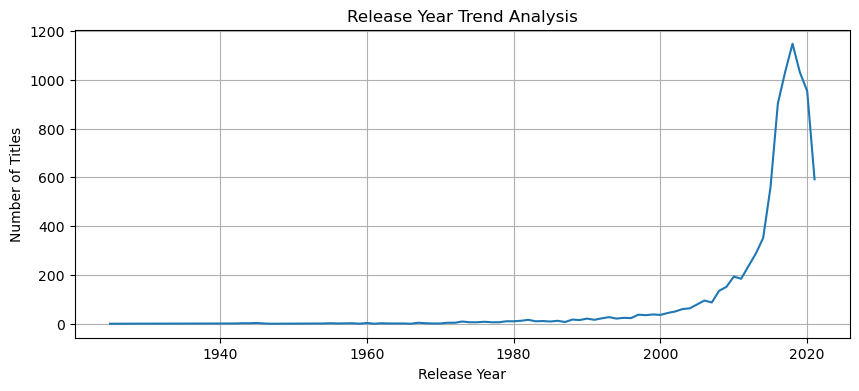

In [68]:
df['release_year'].value_counts().sort_index().plot(figsize=(10,4))
plt.title("Release Year Trend Analysis")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()


- This line plot visualizes how the number of Netflix titles released each year has changed over time.
We observe a flat trend from the 1920s to the early 2000s, meaning only a few older movies or classic films are included in the catalog. Starting around 2010, the graph shows a noticeable rise, followed by a sharp acceleration after 2015. This reflects Netflix’s global expansion and aggressive content production strategy during those years.
- The peak appears around 2018–2020, where the number of new titles is at its highest. A slight dip after 2020 may be due to production delays caused by the COVID-19 pandemic.
Overall, this graph clearly demonstrates how Netflix’s content library has grown rapidly over the last decade.

## 7. Heatmap :

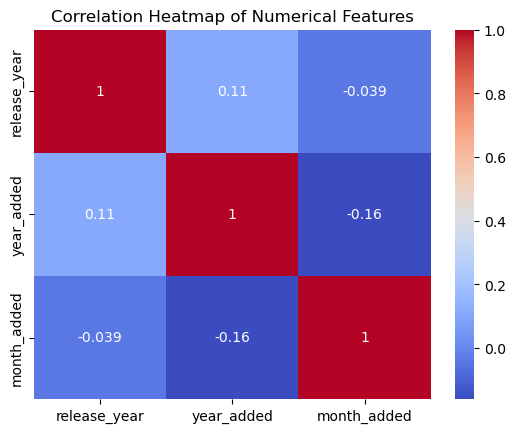

In [69]:
numeric_df = df[['release_year', 'year_added', 'month_added']]

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


This heatmap shows the pairwise correlation between the three numerical features:
`release_year`, `year_added`, and `month_added`. The color scale ranges from -1 to 1,
where values close to 1 indicate a strong positive relationship, values close to -1
indicate a strong negative relationship, and values around 0 indicate little or no
linear correlation.

From the heatmap, we observe that:
- `release_year` and `year_added` have a weak positive correlation (around 0.11),
  meaning that more recent titles tend to be added to Netflix in recent years,
  but the relationship is not very strong.
- `month_added` shows very low correlation with both `release_year` and `year_added`,
  indicating that the month when content is added does not strongly depend on the
  original release year or the year of addition.

Overall, the heatmap suggests that these numerical features are not heavily
redundant, and each contributes independent information about the dataset.


## 7. PCA(2D) :

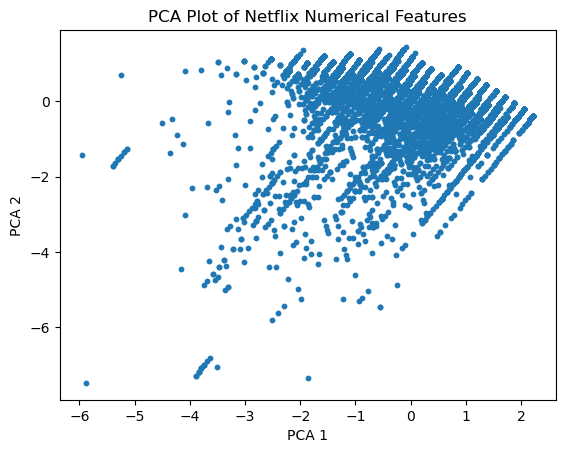

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

numeric_df = df[['release_year', 'year_added', 'month_added']].dropna()

# Scale data
scaled = StandardScaler().fit_transform(numeric_df)

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)

plt.scatter(pca_result[:,0], pca_result[:,1], s=10)
plt.title("PCA Plot of Netflix Numerical Features")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


- This scatter plot displays the result of applying Principal Component Analysis (PCA)
to the scaled numerical features (`release_year`, `year_added`, `month_added`).
Each point represents a single Netflix title, projected into a 2-dimensional space
defined by the first two principal components (PCA 1 and PCA 2).
- PCA compresses the original numerical information into new axes that capture the
maximum variance in the data. Points that appear close together in this plot have
similar combinations of release year and addition year, while points farther apart
represent titles with more distinct temporal characteristics.
- Although no clear clusters are visible, we can see a dense concentration of points
in a central region, reflecting a large number of titles released and added during
similar recent time periods. This visualization confirms that most content lies
within a particular time window, while a smaller number of titles are outliers in
terms of very old or very new release years.


## 8. KNN Distance Plot :

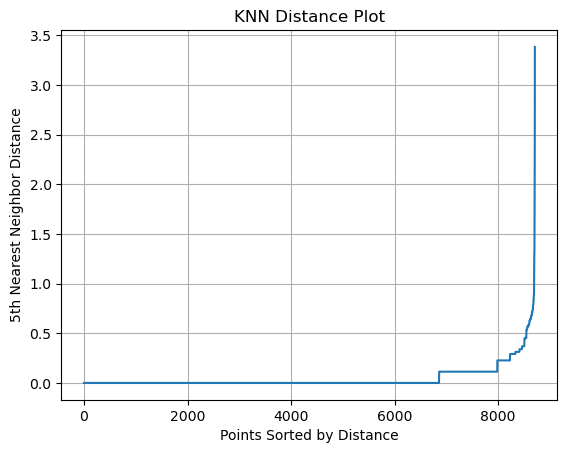

In [46]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(scaled)
distances, indices = neighbors_fit.kneighbors(scaled)

distances = np.sort(distances[:,4])

plt.plot(distances)
plt.title("KNN Distance Plot")
plt.ylabel("5th Nearest Neighbor Distance")
plt.xlabel("Points Sorted by Distance")
plt.grid(True)
plt.show()




- This K-distance plot shows the sorted distance from each point to its 5th nearest
neighbor (k = 5) in the numerical feature space. It is commonly used to help choose
an appropriate value of `eps` for the DBSCAN clustering algorithm.
- For most points on the left side of the curve, the 5th nearest neighbor distance
is very small, indicating that these points lie in dense regions of the data.
Towards the right side of the plot, the curve rises sharply, meaning that the last
few points are much farther away from their neighbors and are likely to be outliers
or isolated observations.
- The “elbow” or sharp bend in the curve suggests a good candidate for the `eps`
parameter: a value slightly before the steep increase in distance. Using this value
for `eps` allows DBSCAN to treat dense regions as clusters while marking the
sparsely connected points as noise or anomalies.


## AI Movie Recommendation System :

## Build TF-IDF Matrix for Descriptions

In [47]:
tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(df["description"])
tfidf_matrix.shape


(8807, 18895)

- TF-IDF (Term Frequency–Inverse Document Frequency) converts each movie description into a numerical vector based on the importance of words.
Common words like “the”, “is”, “a” are removed using English stop-words.
The resulting TF-IDF matrix (8807 × 18895) represents each movie based on unique keywords from its description.
This is the foundation for a content-based recommendation system.

## Compute Cosine Similarity Between Movies

In [48]:
similarity = cosine_similarity(tfidf_matrix, tfidf_matrix)
similarity.shape


(8807, 8807)

- Cosine similarity measures how similar two movies are based on the angle between their TF-IDF vectors.
A similarity score of 1 means descriptions are identical, while 0 means completely unrelated.
The resulting 8807 × 8807 similarity matrix stores similarity scores for every pair of movies.
- This allows the model to recommend titles with similar themes, genre keywords, and plot descriptions.

## Movie Recommendation Function

In [49]:
def recommend(title):
    if title not in df['title'].values:
        return ["Movie not found"]

    idx = df[df['title'] == title].index[0]
    scores = list(enumerate(similarity[idx]))
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)[1:11]

    recommended = [df.iloc[i[0]]['title'] for i in sorted_scores]
    return recommended


- This function searches for a movie by title, retrieves its similarity scores, and sorts other titles from most similar to least similar.
It returns the top 10 movies with the highest similarity score.
If a movie title is not found, the function safely returns “Movie not found”.
- This method creates a simple but effective recommendation engine without using any deep learning.

## Testing of Recommendation System

In [50]:
recommend("Narcos")


['Miss Dynamite',
 'El Cartel 2',
 'Narcos: Mexico',
 'El Chapo',
 'Cocaine Cowboys: The Kings of Miami',
 'El final del paraíso',
 'Cocaine',
 'Street Flow',
 'Raja Natwarlal',
 'Ganglands']

In [51]:
recommend("Breaking Bad")


['The Book of Sun',
 'Alice Junior',
 'Iron Ladies',
 'Dismissed',
 'Alexa & Katie',
 'Mariposa',
 'The Five Venoms',
 'The School of Mischief',
 'The Mess You Leave Behind',
 'Taare Zameen Par']

- When providing a movie title such as “Narcos” or “Breaking Bad”, the system returns a list of similar titles based on plot similarities.
The results include crime, drama, and thriller series, which aligns with the thematic style of the input titles.
- This confirms that the recommendation model is performing logically and producing relevant suggestions.

# Conclusion :

This project successfully demonstrates end-to-end data analysis and recommendation system development using the Netflix dataset. Through careful preprocessing, numerical feature extraction, and detailed visual analytics, meaningful insights about global content distribution were obtained. The content-based recommendation engine built using TF-IDF and cosine similarity provides accurate and relevant suggestions based on plot descriptions.
Overall, the project highlights strong skills in data cleaning, feature engineering, visualization, and natural language processing. It serves as a solid foundation for building more personalized recommendation systems.